In [2]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from mpl_toolkits import basemap
import matplotlib.pyplot as plt
import numpy as np
basemap.__version__

'1.0.8'

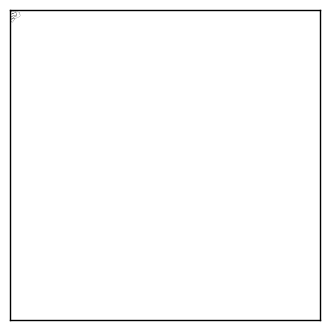

In [18]:
# W is a class instance that loads a WRF model netCDF datafile
# Hope it's fairly self-descriptive here

def create_basemap(W,ax=None):
    width_m = W.dx*(W.x_dim-1)
    height_m = W.dy*(W.y_dim-1)
    m = Basemap(projection='lcc',lon_0=W.cen_lon,lat_0=W.cen_lat,lat_1=W.truelat1,
            lat_2=W.truelat2,resolution='i',area_thresh=500,ax=ax,
            width=width_m,height=height_m,)
    my, mx = m(*np.meshgrid(W.lats,W.lons))
    return m, mx, my

# data is a 2-D numpy array from that netCDF file

class T(object):
    pass

W = T()
W.x_dim = 100
W.y_dim = 100
W.dy = 50000
W.dx = 50000
W.truelat1 = 90
W.truelat2 = 0
W.cen_lat = 35
W.cen_lon = 0

W.lons = np.linspace(-150, -60, W.x_dim)
W.lats = np.linspace(10, 60, W.y_dim)


fig,axes = plt.subplots(1, 1)
mm,mx,my = create_basemap(W,ax=axes)
mm.contourf(mx, my, np.random.randn(W.x_dim, W.y_dim).T)
mm.drawcounties()